# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [12]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [4]:
import pandas as pd
import pickle
mailout_train = pickle.load(open("mailout_train.pickle", "rb"))

In [6]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [7]:
mailout_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42962 entries, 0 to 42961
Columns: 367 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(6)
memory usage: 120.3+ MB


First, the data has to be cleaned:

In [9]:
#evaluation of missing info:
mailout_train_nan = mailout_train.isnull().sum()

In [10]:
mailout_train_nan

LNR                         0
AGER_TYP                    0
AKT_DAT_KL               6969
ALTER_HH                 6969
ALTER_KIND1             40974
                        ...  
WOHNLAGE                 7777
ZABEOTYP                    0
RESPONSE                    0
ANREDE_KZ                   0
ALTERSKATEGORIE_GROB        0
Length: 367, dtype: int64

Text(0, 0.5, 'number of columns')

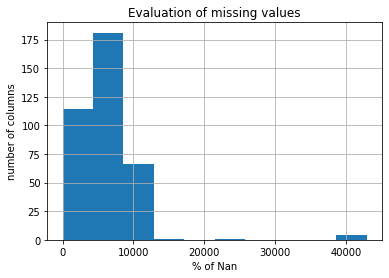

In [13]:
mailout_train_nan.hist()
plt.title('Evaluation of missing values')
plt.xlabel('% of Nan')
plt.ylabel('number of columns')

In [16]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
col_to_drop = ['ALTERSKATEGORIE_FEIN', 'CJT_GESAMTTYP', 'D19_KONSUMTYP',
                    'D19_LETZTER_KAUF_BRANCHE', 'D19_LOTTO', 'D19_SOZIALES', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'FINANZTYP', 'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GFK_URLAUBERTYP', 'HEALTH_TYP',
       'KBA05_HERSTTEMP', 'KBA05_MAXHERST', 'KBA05_MODTEMP', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'OST_WEST_KZ',
       'PRAEGENDE_JUGENDJAHRE', 'SHOPPER_TYP', 'VERS_TYP',
        'ANREDE_KZ',
       'CAMEO_INTL_2015', 'EINGEFUEGT_AM', 'D19_BEKLEIDUNG_REST', 'D19_VERSAND_REST', 'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_DATUM', 'D19_VERSI_ONLINE_DATUM', 'D19_VERSICHERUNGEN', 'DSL_FLAG', 'D19_WEIN_FEINKOST', 'D19_VOLLSORTIMENT', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'BALLRAUM']

In [26]:
mailout_train_less = mailout_train.drop(col_to_drop, axis=1)

In [27]:
mailout_train_less.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,15.0,0.0,...,2.0,5.0,2.0,1.0,6.0,9.0,3.0,3,0,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,1.0,0.0,...,3.0,1.0,2.0,1.0,4.0,9.0,7.0,1,0,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,6.0,4.0,2.0,NaN,9.0,2.0,3,0,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,4.0,0.0,...,4.0,8.0,11.0,11.0,6.0,9.0,1.0,3,0,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,53.0,0.0,...,4.0,2.0,2.0,1.0,6.0,9.0,3.0,3,0,3


Missing values should be now converted to NaNs:
    

In [64]:
unknown_single = pickle.load(open("unknown_single.pickle", "rb"))

In [65]:
unknown_single.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
11,ALTER_HH,main age within the household,0,unknown / no main age detectable
40,BALLRAUM,distance to next urban centre,-1,unknown
48,BIP_FLAG,business-flag indicating companies in the buil...,-1,unknown
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown


In [66]:
for i in unknown_single['Attribute']:
    print(i)
    if i in mailout_train_less.columns:
        x = unknown_single.loc[unknown_single['Attribute'] == i, 'Value'].iloc[0]
        y = mailout_train_less.loc[:, i].isin([x])
        mailout_train_less.loc[y, i] = np.NaN
    else:
        continue

AGER_TYP
ALTER_HH
BALLRAUM
BIP_FLAG
CAMEO_DEUG_2015
CAMEO_DEUINTL_2015
CJT_GESAMTTYP
D19_KK_KUNDENTYP
EWDICHTE
FINANZTYP
FINANZ_ANLEGER
FINANZ_HAUSBAUER
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_UNAUFFAELLIGER
FINANZ_VORSORGER
HEALTH_TYP
INNENSTADT
KBA05_ANTG1
KBA05_ANTG2
KBA05_ANTG3
KBA05_ANTG4
KBA13_ALTERHALTER_30
KBA13_ALTERHALTER_45
KBA13_ALTERHALTER_60
KBA13_ALTERHALTER_61
KBA13_AUDI
KBA13_AUTOQUOTE
KBA13_BJ_1999
KBA13_BJ_2000
KBA13_BJ_2004
KBA13_BJ_2006
KBA13_BJ_2008
KBA13_BJ_2009
KBA13_BMW
KBA13_CCM_1000
KBA13_CCM_1200
KBA13_CCM_1400
KBA13_CCM_0_1400
KBA13_CCM_1500
KBA13_CCM_1400_2500
KBA13_CCM_1600
KBA13_CCM_1800
KBA13_CCM_2000
KBA13_CCM_2500
KBA13_CCM_2501
KBA13_CCM_3000
KBA13_CCM_3001
KBA13_FAB_ASIEN
KBA13_FAB_SONSTIGE
KBA13_FIAT
KBA13_FORD
KBA13_HALTER_20
KBA13_HALTER_25
KBA13_HALTER_30
KBA13_HALTER_35
KBA13_HALTER_40
KBA13_HALTER_45
KBA13_HALTER_50
KBA13_HALTER_55
KBA13_HALTER_60
KBA13_HALTER_65
KBA13_HALTER_66
KBA13_HERST_ASIEN
KBA13_HERST_AUDI_VW
KBA13_HERST_BMW_BENZ
KBA13_H

In [79]:
for i in mailout_train.columns:
    print(mailout_train[i].value_counts())

0.540003    1
0.809893    1
0.942793    1
0.792876    1
0.432023    1
           ..
0.663356    1
0.240425    1
0.856715    1
0.543278    1
1.000000    1
Name: 0, Length: 42962, dtype: int64
0.00    17963
0.75    12470
0.50     9229
1.00     2373
0.25      927
Name: 1, dtype: int64
0.000000    31999
0.065655     6969
1.000000     1195
0.125000      788
0.500000      502
0.250000      403
0.625000      298
0.375000      281
0.750000      279
0.875000      248
Name: 2, dtype: int64
0.489788    6969
0.000000    6208
0.428571    3922
0.476190    3775
0.380952    2701
0.523810    2276
0.571429    2135
0.333333    1749
0.619048    1644
0.714286    1559
0.666667    1508
1.000000    1412
0.761905    1356
0.904762    1255
0.809524    1245
0.952381    1216
0.857143    1175
0.285714     705
0.238095     122
0.190476      26
0.142857       4
Name: 3, dtype: int64
0.662884    40974
1.000000      223
0.937500      197
0.812500      186
0.750000      165
0.875000      160
0.687500      154
0.500000  

In [165]:
unknown_multiple = pickle.load(open("unknown_multiple.pickle", "rb"))

In [170]:
for i in unknown_multiple['Attribute']:
    print(i)
    if i in mailout_train_less.columns:
        x = unknown_multiple.loc[unknown_multiple['Attribute'] == i, 'Value'].iloc[0]
        y = mailout_train_less.loc[:, i].isin([x])
        mailout_train_less.loc[y, i] = np.NaN
    else:
        continue

ALTERSKATEGORIE_GROB
ANREDE_KZ
GEBAEUDETYP
GEOSCORE_KLS7
HAUSHALTSSTRUKTUR
HH_EINKOMMEN_SCORE
KBA05_ALTER1
KBA05_ALTER2
KBA05_ALTER3
KBA05_ALTER4
KBA05_ANHANG
KBA05_AUTOQUOT
KBA05_BAUMAX
KBA05_CCM1
KBA05_CCM2
KBA05_CCM3
KBA05_CCM4
KBA05_DIESEL
KBA05_FRAU
KBA05_GBZ
KBA05_HERST1
KBA05_HERST2
KBA05_HERST3
KBA05_HERST4
KBA05_HERST5
KBA05_HERSTTEMP
KBA05_KRSAQUOT
KBA05_KRSHERST1
KBA05_KRSHERST2
KBA05_KRSHERST3
KBA05_KRSKLEIN
KBA05_KRSOBER
KBA05_KRSVAN
KBA05_KRSZUL
KBA05_KW1
KBA05_KW2
KBA05_KW3
KBA05_MAXAH
KBA05_MAXBJ
KBA05_MAXHERST
KBA05_MAXSEG
KBA05_MAXVORB
KBA05_MOD1
KBA05_MOD2
KBA05_MOD3
KBA05_MOD4
KBA05_MOD8
KBA05_MODTEMP
KBA05_MOTOR
KBA05_MOTRAD
KBA05_SEG1
KBA05_SEG10
KBA05_SEG2
KBA05_SEG3
KBA05_SEG4
KBA05_SEG5
KBA05_SEG6
KBA05_SEG7
KBA05_SEG8
KBA05_SEG9
KBA05_VORB0
KBA05_VORB1
KBA05_VORB2
KBA05_ZUL1
KBA05_ZUL2
KBA05_ZUL3
KBA05_ZUL4
KKK
NATIONALITAET_KZ
PRAEGENDE_JUGENDJAHRE
REGIOTYP
RELAT_AB
SEMIO_DOM
SEMIO_ERL
SEMIO_FAM
SEMIO_KAEM
SEMIO_KRIT
SEMIO_KULT
SEMIO_LUST
SEMIO_MAT
SEMIO_PFLI

In [168]:
no_transaction_known = pickle.load(open("no_transaction_known.pickle", "rb"))

In [169]:
for i in no_transaction_known['Attribute']:
    print(i)
    if i in mailout_train_less.columns:
        x = no_transaction_known.loc[no_transaction_known['Attribute'] == i, 'Value'].iloc[0]
        y = mailout_train_less.loc[:, i].isin([x])
        mailout_train_less.loc[y, i] = np.NaN
    else:
        continue

AGER_TYP
ALTER_HH
BIP_FLAG
D19_BANKEN_ANZ_12
D19_BANKEN_ANZ_24
D19_BANKEN_DATUM
D19_BANKEN_DIREKT_RZ
D19_BANKEN_GROSS_RZ
D19_BANKEN_LOKAL_RZ
D19_BANKEN_OFFLINE_DATUM
D19_BANKEN_ONLINE_DATUM
D19_BANKEN_ONLINE_QUOTE_12
D19_BANKEN_REST_RZ
D19_BEKLEIDUNG_GEH_RZ
D19_BEKLEIDUNG_REST_RZ
D19_BILDUNG_RZ
D19_BIO_OEKO_RZ
D19_BUCH_RZ
D19_DIGIT_SERV_RZ
D19_DROGERIEARTIKEL_RZ
D19_ENERGIE_RZ
D19_FREIZEIT_RZ
D19_GARTEN_RZ
D19_GESAMT_ANZ_12
D19_GESAMT_ANZ_24
D19_GESAMT_DATUM
D19_GESAMT_OFFLINE_DATUM
D19_GESAMT_ONLINE_DATUM
D19_GESAMT_ONLINE_QUOTE_12
D19_HANDWERK_RZ
D19_HAUS_DEKO_RZ
D19_KINDERARTIKEL_RZ
D19_KOSMETIK_RZ
D19_LEBENSMITTEL_RZ
D19_LOTTO_RZ
D19_NAHRUNGSERGAENZUNG_RZ
D19_RATGEBER_RZ
D19_REISEN_RZ
D19_SAMMELARTIKEL_RZ
D19_SCHUHE_RZ
D19_SONSTIGE_RZ
D19_TECHNIK_RZ
D19_TELKO_ANZ_12
D19_TELKO_ANZ_24
D19_TELKO_DATUM
D19_TELKO_MOBILE_RZ
D19_TELKO_OFFLINE_DATUM
D19_TELKO_ONLINE_DATUM
D19_TELKO_REST_RZ
D19_TIERARTIKEL_RZ
D19_VERSAND_ANZ_12
D19_VERSAND_ANZ_24
D19_VERSAND_DATUM
D19_VERSAND_OFFLINE_DATUM


In [171]:
mailout_train_imputed = pd.DataFrame(imputer.fit_transform(mailout_train_less))

In [172]:
mailout_train_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,1763.0,2.0,1.0,8.0,12.606137,13.783069,14.655172,14.195122,15.0,0.000000,...,2.0,5.0,2.0,1.0,6.000000,9.0,3.0,3.0,0.0,4.0
1,1771.0,1.0,4.0,13.0,12.606137,13.783069,14.655172,14.195122,1.0,0.000000,...,3.0,1.0,2.0,1.0,4.000000,9.0,7.0,1.0,0.0,3.0
2,1776.0,1.0,1.0,9.0,12.606137,13.783069,14.655172,14.195122,0.0,0.049574,...,1.0,6.0,4.0,2.0,4.590321,9.0,2.0,3.0,0.0,4.0
3,1460.0,2.0,1.0,6.0,12.606137,13.783069,14.655172,14.195122,4.0,0.000000,...,4.0,8.0,11.0,11.0,6.000000,9.0,1.0,3.0,0.0,4.0
4,1783.0,2.0,1.0,9.0,12.606137,13.783069,14.655172,14.195122,53.0,0.000000,...,4.0,2.0,2.0,1.0,6.000000,9.0,3.0,3.0,0.0,3.0


In [173]:
mailout_train_imputed.columns = mailout_train_less.columns

In [174]:
mailout_train_imputed.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ALTERSKATEGORIE_GROB
0,1763.0,2.0,1.0,8.0,12.606137,13.783069,14.655172,14.195122,15.0,0.000000,...,2.0,5.0,2.0,1.0,6.000000,9.0,3.0,3.0,0.0,4.0
1,1771.0,1.0,4.0,13.0,12.606137,13.783069,14.655172,14.195122,1.0,0.000000,...,3.0,1.0,2.0,1.0,4.000000,9.0,7.0,1.0,0.0,3.0
2,1776.0,1.0,1.0,9.0,12.606137,13.783069,14.655172,14.195122,0.0,0.049574,...,1.0,6.0,4.0,2.0,4.590321,9.0,2.0,3.0,0.0,4.0
3,1460.0,2.0,1.0,6.0,12.606137,13.783069,14.655172,14.195122,4.0,0.000000,...,4.0,8.0,11.0,11.0,6.000000,9.0,1.0,3.0,0.0,4.0
4,1783.0,2.0,1.0,9.0,12.606137,13.783069,14.655172,14.195122,53.0,0.000000,...,4.0,2.0,2.0,1.0,6.000000,9.0,3.0,3.0,0.0,3.0


In [175]:
#now the data has to be normalized (scaling numerical features into a normalized range, 0-1:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()

mailout_train_scaled = pd.DataFrame(scaler.fit_transform(mailout_train_imputed))

In [176]:
mailout_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,0.020538,0.5,0.000,0.277778,0.662884,0.675621,0.721264,0.682927,0.034247,0.000000,...,0.50,0.4,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.0,0.375
1,0.020631,0.0,0.375,0.555556,0.662884,0.675621,0.721264,0.682927,0.002283,0.000000,...,0.75,0.0,0.083333,0.0,0.600000,1.0,0.857143,0.0,0.0,0.250
2,0.020689,0.0,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.000000,0.002479,...,0.25,0.5,0.250000,0.1,0.718064,1.0,0.142857,0.4,0.0,0.375
3,0.017006,0.5,0.000,0.166667,0.662884,0.675621,0.721264,0.682927,0.009132,0.000000,...,1.00,0.7,0.833333,1.0,1.000000,1.0,0.000000,0.4,0.0,0.375
4,0.020771,0.5,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.121005,0.000000,...,1.00,0.1,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.0,0.250


In [177]:
mailout_train_scaled.columns = mailout_train_less.columns

In [178]:
mailout_train_scaled.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ALTERSKATEGORIE_GROB
0,0.020538,0.5,0.000,0.277778,0.662884,0.675621,0.721264,0.682927,0.034247,0.000000,...,0.50,0.4,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.0,0.375
1,0.020631,0.0,0.375,0.555556,0.662884,0.675621,0.721264,0.682927,0.002283,0.000000,...,0.75,0.0,0.083333,0.0,0.600000,1.0,0.857143,0.0,0.0,0.250
2,0.020689,0.0,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.000000,0.002479,...,0.25,0.5,0.250000,0.1,0.718064,1.0,0.142857,0.4,0.0,0.375
3,0.017006,0.5,0.000,0.166667,0.662884,0.675621,0.721264,0.682927,0.009132,0.000000,...,1.00,0.7,0.833333,1.0,1.000000,1.0,0.000000,0.4,0.0,0.375
4,0.020771,0.5,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.121005,0.000000,...,1.00,0.1,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.0,0.250


In [179]:
[mailout_train_scaled.columns]

[Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
        'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ANZ_HAUSHALTE_AKTIV',
        'ANZ_HH_TITEL',
        ...
        'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
        'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP', 'RESPONSE',
        'ALTERSKATEGORIE_GROB'],
       dtype='object', length=325)]

In [180]:
becamse_customer = mailout_train_scaled["RESPONSE"] == 1

In [181]:
becamse_customer.head()

0    False
1    False
2    False
3    False
4    False
Name: RESPONSE, dtype: bool

In [182]:
becamse_customer_1 = mailout_train_scaled[becamse_customer].shape[0]

In [183]:
becamse_customer_1

532

In [184]:
#make the dataframe for future visualizations

In [185]:
responses = mailout_train_scaled.RESPONSE.value_counts()

In [186]:
responses

0.0    42430
1.0      532
Name: RESPONSE, dtype: int64

In [187]:
import pandas as pd
dataframe_response = pd.DataFrame({'RESPONSE': responses.index, "data": responses.values})

In [188]:
dataframe_response

,RESPONSE,data
0,0.0,42430
1,1.0,532


In [189]:
becamse_customer_1

532

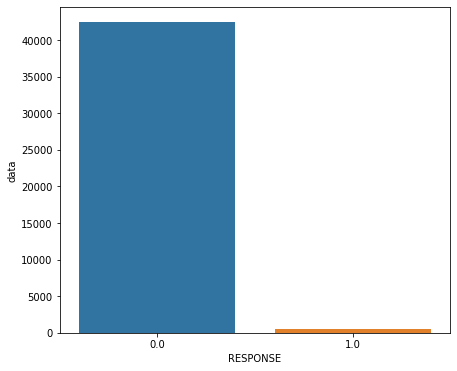

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(7, 6)) 
sns.barplot(x = "RESPONSE", y = "data", data = dataframe_response)

It can be clearly seen that the dataset is imbalanced, because only 532 persons because customers (out of population of 42430)

for future modelling data needs to be splitted into features/responses:

Having considered that this is a classification problem and the data is highly imbalanced, ROC-AUC analysis will be uised as evaluation metric

XGBoost will be used now as a supevised learning model 

Defining labels and features:

In [191]:
response = mailout_train_scaled["RESPONSE"]

In [192]:
features = mailout_train_scaled.drop(['RESPONSE'], axis = 1)

In [193]:
response.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RESPONSE, dtype: float64

In [194]:
features.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ALTERSKATEGORIE_GROB
0,0.020538,0.5,0.000,0.277778,0.662884,0.675621,0.721264,0.682927,0.034247,0.000000,...,0.2,0.50,0.4,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.375
1,0.020631,0.0,0.375,0.555556,0.662884,0.675621,0.721264,0.682927,0.002283,0.000000,...,0.2,0.75,0.0,0.083333,0.0,0.600000,1.0,0.857143,0.0,0.250
2,0.020689,0.0,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.000000,0.002479,...,0.8,0.25,0.5,0.250000,0.1,0.718064,1.0,0.142857,0.4,0.375
3,0.017006,0.5,0.000,0.166667,0.662884,0.675621,0.721264,0.682927,0.009132,0.000000,...,0.2,1.00,0.7,0.833333,1.0,1.000000,1.0,0.000000,0.4,0.375
4,0.020771,0.5,0.000,0.333333,0.662884,0.675621,0.721264,0.682927,0.121005,0.000000,...,0.0,1.00,0.1,0.083333,0.0,1.000000,1.0,0.285714,0.4,0.250


In [195]:
response.shape[0]

42962

In [196]:
response.shape

(42962,)

In [197]:
np.asarray(features)

array([[0.02053757, 0.5       , 0.        , ..., 0.28571429, 0.4       ,
        0.375     ],
       [0.02063081, 0.        , 0.375     , ..., 0.85714286, 0.        ,
        0.25      ],
       [0.02068909, 0.        , 0.        , ..., 0.14285714, 0.4       ,
        0.375     ],
       ...,
       [0.7957666 , 0.        , 0.        , ..., 0.85714286, 0.        ,
        0.375     ],
       [0.7993566 , 0.5       , 0.        , ..., 0.14285714, 0.4       ,
        0.375     ],
       [0.80685129, 0.5       , 0.        , ..., 0.85714286, 0.4       ,
        0.375     ]])

In [198]:
from sklearn.model_selection import StratifiedKFold

In [199]:
data_shuffling = StratifiedKFold(random_state = 123)

c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [200]:
data_shuffling.get_n_splits(features, response)

3

In [201]:
print(data_shuffling)

StratifiedKFold(n_splits=3, random_state=123, shuffle=False)


In [202]:
import xgboost as xgb

In [203]:
from xgboost.sklearn import XGBRegressor

In [204]:
model_xgboost = XGBRegressor()

In [205]:
import random

In [206]:
from sklearn.svm import SVC

In [207]:
model_svc = SVC()

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
model_lr = LogisticRegression()

In [210]:
model_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [211]:
from sklearn.metrics import roc_auc_score

In [212]:
from sklearn.pipeline import Pipeline

In [226]:
from sklearn.model_selection import GridSearchCV

In [320]:
model_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [321]:
model_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [322]:
model_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
model_outcome = {}

for a, b in enumerate([model_xgboost, model_svc, model_lr]):

    # Create machine learning pipeline
    pipeline = Pipeline([
        ('imp', imputer),
        ('scale', scaler),
        ('clf', b)
    ])

    scores = []
    counter = 0

    # Perform 5-fold validation
    for train_index, test_index in data_shuffling.split(features, response):
        counter+=1
        print('Classifier {}: Fold {}...'.format(a+1, counter))
        
        # Split the data into training and test sets
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = response.iloc[train_index], response.iloc[test_index]

        # Train using the pipeline
        pipeline.fit(X_train, y_train)

        #Predict on the test data
        y_pred = pipeline.predict(X_test)

        score = roc_auc_score(y_test, y_pred)
        scores.append(score)
        print(score)

    model_outcome[b] = scores


Classifier 1: Fold 1...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:46:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.652317733489247
Classifier 1: Fold 2...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:46:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6972116129398226
Classifier 1: Fold 3...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:46:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6776585090705869
Classifier 2: Fold 1...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5
Classifier 2: Fold 2...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5
Classifier 2: Fold 3...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5
Classifier 3: Fold 1...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5
Classifier 3: Fold 2...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5
Classifier 3: Fold 3...


c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5


In [215]:
model_scores_dataframe = pd.DataFrame(model_outcome)

In [216]:
model_scores_dataframe = pd.DataFrame(model_outcome)
model_scores_dataframe.columns = ["XGBoost", "SVM", "Logistic Regression"]

In [218]:
model_scores_dataframe.describe()

,XGBoost,SVM,Logistic Regression
count,3.000000,3.0,3.0
mean,0.675729,0.5,0.5
std,0.022509,0.0,0.0
min,0.652318,0.5,0.5
25%,0.664988,0.5,0.5
50%,0.677659,0.5,0.5
75%,0.687435,0.5,0.5
max,0.697212,0.5,0.5


In [244]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False, shuffle = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print("\nModel Report")
    #print("Accuracy : %.4g") % metrics.accuracy_score(y_train.values, dtrain_predictions)
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob)
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

SyntaxError: unexpected EOF while parsing (<ipython-input-244-01bc1f87386f>, line 24)

Hyperparametertuning for XGBoost was followed as on the guide hier: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [289]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, shuffle = True)
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print('n_estimators', cvresult.shape[0]) #to see how many n_estimators is good for the model
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print("\nModel Report")
    #print("Accuracy : %.4g") % metrics.accuracy_score(y_train.values, dtrain_predictions)
    cross_validation = cross_val_score(alg, X_train, y_train, scoring='roc_auc', cv=5,n_jobs=-1,verbose=10)
    auc = np.average(cross_validation)
    print("AUC Score: %f" % auc)
    #print("AUC Score: %f" % metrics.roc_auc_score(y_test,dtrain_predprob))
    #print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))                
        
    #print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')    


Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [290]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics 

In [291]:
from sklearn.model_selection import cross_val_score

In [292]:
#determine the number of estimators

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, train, predictors)
modelfit(xgb1, X_train, y_train)

c:\users\prenns\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


n_estimators 17

Model Report


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.1s remaining:    2.0s


AUC Score: 0.682123


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


Step 2: Tune max_depth and min_child_weight

In [294]:
#
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=17, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_score_, gsearch1.best_params_, gsearch1.best_score_

(0.6858471976349294,
 {'max_depth': 3, 'min_child_weight': 5},
 0.6858471976349294)

we can see that AUC score is increasing slowly and that the optimum values are 4 for max_depth and 3 for min_child_weight

In [303]:
#taking a depper look into 'max_depth': and 'min_child_weight' by searching for values 1 above and below the optimum vlaues
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=17, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_score_, gsearch2.best_params_, gsearch2.best_score_

(0.6858471976349294,
 {'max_depth': 3, 'min_child_weight': 5},
 0.6858471976349294)

Step 3: Tune gamma

In [304]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_score_, gsearch3.best_params_, gsearch3.best_score_

(0.6858471976349294, {'gamma': 0.0}, 0.6858471976349294)

Step 4: Tune subsample and colsample_bytree

In [306]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_score_, gsearch4.best_params_, gsearch4.best_score_

(0.6926140989695853,
 {'colsample_bytree': 0.9, 'subsample': 0.8},
 0.6926140989695853)

In [309]:
param_test5 = {
 'subsample':[i/100.0 for i in range(80,100,5)],
 'colsample_bytree':[i/100.0 for i in range(70,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch4.best_score_, gsearch4.best_params_, gsearch4.best_score_

(0.6926140989695853,
 {'colsample_bytree': 0.9, 'subsample': 0.8},
 0.6926140989695853)

stays the same - it means I leave values for {'colsample_bytree': 0.9, 'subsample': 0.8}.

Step 5: Tuning Regularization Parameters

In [312]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_score_, gsearch6.best_params_, gsearch6.best_score_

(0.6926368469449523, {'reg_alpha': 1e-05}, 0.6926368469449523)

Final model

In [319]:
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=17,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.9,
 reg_alpha=1e-5,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

model.fit(X_train,y_train, eval_metric = 'auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=17, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
####rest

Find out if the dataset is balanced or not by calculating how many people because customers in the whole compaign:

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')